# Surface density analysis

written by Anezka, version 21-07-2025

In [1]:
from origami_analysis import*

# analysis manual

## INPUT

0) set the degree of labelling of the protein used (insert the value in the dol variable)
   
2) set the single-molecule localization data directory, filename(s) and frame to be analyzed.

**Single-molecule LOCALIZATION data** = data, where it is easy to distinguish & localize each signal. The measured signal is coming from a single molecule (protein, origami with one ligand, etc.). This data is used to calculate surface density from *the number of localized molecules* in .h5 files (the locator output). The surface density is corrected for the degree of labelling (=dol) and roi size.

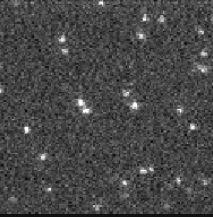

2) Set bulk data directory, filename(s), and frame(s). In addition, set the brightness data directory, filename(s), and frame(s).
   
**Bulk data** = data, where signals overlay, either because of high(er) surface density of monomeric molecules, or measured signal is coming from a cluster of molecules (protein oligomers, origami with 2 ligands, etc.) 

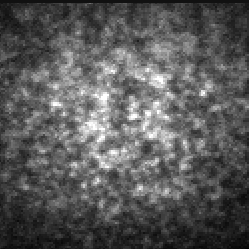

Surface density is calculated as:
$$ \text{surface density} = \frac{\text{bulk intensity - background} }{ \text{single molecule brightness}} $$

**Single-molecule BRIGHTNESS data** = data with single-molecule information (either low-density sample as in (1), or last frames of bulk data). From this data, the single-molecule brightness and the single-molecule background are taken. This data can be used to check the quality of your dataset.

If more than 1 single-molecule brightness filename is used, there are 2 options for calculating bulk surface density:

  - use the mean of all brightness data (brightness data are correlated >> set *brightness_correlation=True*) 
  - use individual brightness data for each bulk data (eg, for bulk number 1, brightness_data number 1; order is important here!). Brightness data are not correlated, set *brightness_correlation=False*


3) choose *homogenously illuminated* rectangular roi in the image-j, insert the top-left and bottom-right coordinates here. Keep the coordinates the same for bulk & brightness data! The roi size is calculated based on the given coordinates. The respective roi (from raw brightness and raw single-molecule data) is cut and saved as a .tiff file

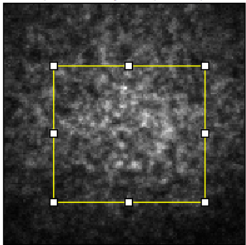

3) use the locator to localize new .tiff single-molecule data (to define single-molecule surface density), and .tiff brightness data (to define single-molecule brightness and single-molecule background). Use daostorm_3d algorithm.

NOTE: The script can be used for analysing single-molecule data only or bulk data only. You do not need both sm/bulk data in order to run the analysis

## OUTPUT

1) **Single-molecule surface density** = mean number of molecules per $\mu m^2$ for the chosen frame, corrected for degree of labelling (= dol) and roi size. The number of molecules is determined from the number of localizations in .h5 files generated by the locator. 

      - *PLOT* = for each measured position within one well (= for each movie in one filename), the mean surface density and error of the mean are calculated. The final plot is saved in the single-molecule data directory defined by the user.
  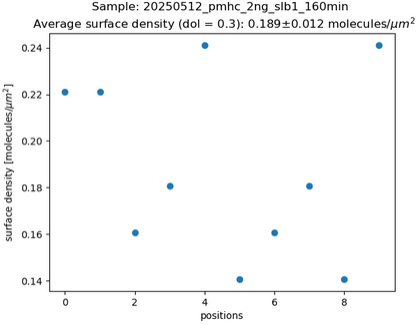


      - overall sm surface density comparison: for all input filenames/wells. The plot is saved in the single-molecule data directory defined by the user.
  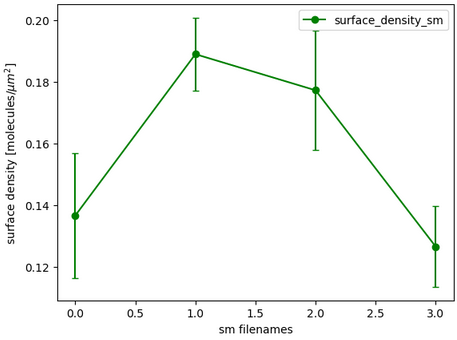
  


2) **Bulk surface density** = mean number of molecules per $\mu m^2$ for the chosen frame, corrected for degree of labelling (= dol) and roi size. The number of molecules is determined from the bulk brightness divided by single-molecule brightness (corrected for single-molecule background). 

      - *PLOT* = for each measured position within one well (= for each movie in one filename), the mean surface density and error of the mean are calculated. The final plot is saved in the bulk data directory defined by the user.
  
      - overall bulk surface density comparison: sm brightness, bulk surface density (with and without correlated sm brightness data: avg/ind), and bulk intensity. The final plot is saved in the bulk data directory defined by the user.
  
   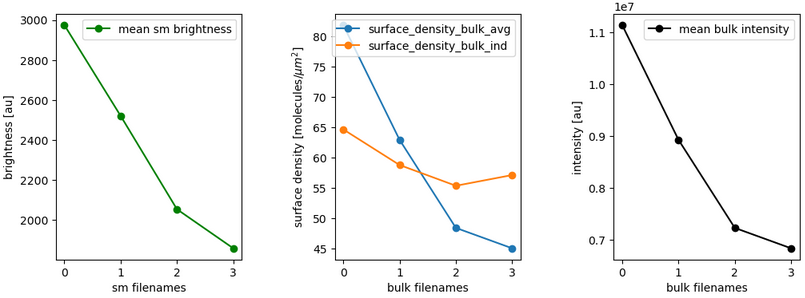


3) Quality check: with **single-molecule brightness data**, the overall quality will be evaluated. The brightness distribution, size distribution, and the mean brightness in time (=frames) is plotted for each brightness filename

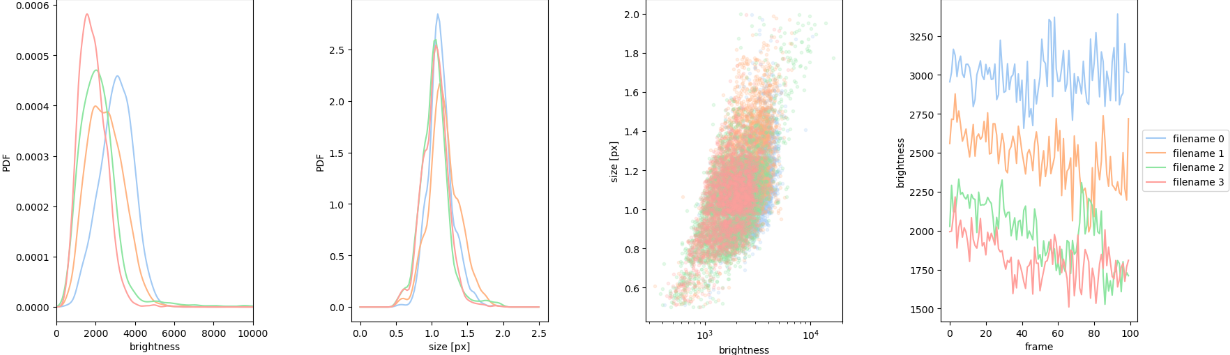

# User input

0) what is the degree of labelling of your fluorophore?

In [2]:
#degree of labeling
dol=1 #0.3

1) set the data directories, filename(s) and frame(s) to be analyzed

 - single-molecule (sm) localization data: for the sm surface density

In [27]:
#data path/folder for sm localization data
data_sm= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb2"

#sm localization data filename(s)/well(s): more than filename/well can be inserted!
data_files_sm_filename=['20251010_37degrees_pmhc_10ng_slb2_110min', '20251010_37degrees_pmhc_10ng_slb2_150min', '20251010_37degrees_pmhc_10ng_slb2_200min', '20251010_37degrees_pmhc_10ng_slb2_260min']

#which frame I want to use for single-molecule localization data (counting starts from 0)
sm_start_frame=4

 - bulk data: for the bulk surface density

In [28]:
#data path/folder for bulk data
data_bulk= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/20ng/slb2"

#bulk localization data filename(s)/well(s): more than filename/well can be inserted!
data_bulk_filename=['20251010_37degrees_pmhc_20ng_slb2_80min','20251010_37degrees_pmhc_20ng_slb2_140min', '20251010_37degrees_pmhc_20ng_slb2_190min', '20251010_37degrees_pmhc_20ng_slb2_250min']

#which frame is the bulk data (counting starts from 0)
bulk_start_frame=4

- sm brightness data: for the bulk surface density and for the quality check

In [29]:
#data path/folder for sm brightness data
data_brightness= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb2"

#sm brightness data filename(s): for sm brightness analysis, for bulk surface density 
data_files_brightness_filename=['20251010_37degrees_pmhc_10ng_slb2_110min', '20251010_37degrees_pmhc_10ng_slb2_150min', '20251010_37degrees_pmhc_10ng_slb2_200min', '20251010_37degrees_pmhc_10ng_slb2_260min']

#which frames I want to use for single-molecula brightness data (counting starts from 0)
brightness_start_frame=20
brightness_final_frame=99

#sm brightness data correlated (brightness_correlation=True) ->> mean of all sm-brightness data will be used to calculate bulk density
#sm brightness data not correlated (brightness_correlation=False) ->> for a certain bulk dataset, corresponding sm-brightness data will be used (eg. for bulk nr. 1, brightness_data nr.1 will be used. 
#NOTE: the order of bulk and brightness filenames is important!!!
brightness_correlation=True


2) choose *homogenously illuminated* rectangular roi in the image-j, insert the top-left and bottom-right coordinates here. ROI size will be calculated, and used to cut and save single-molecule (localization & brightness) .tiff file

In [30]:
#coordinates of top left corner of the chosen roi
top_left=[20,20] #290,40; 30,30

#coordinates of bottom right corner of the chosen roi
bottom_right=[100,100] #380,110; 120,120

size, size_um, roi_imagej=create_roi(top_left, bottom_right, data_sm, data_files_sm_filename, data_brightness, data_files_brightness_filename)

#print(f'ROI size in pixels:  {size}, ROI size in um:  {size_um}')

ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


3) use locator to localize created .tiff single-molecule data 

In [31]:
#localization 
sys.executable
subprocess.run([sys.executable, "-m", "sdt.gui.locator"])

/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2025-10-22 13:39:11.389 python[23071:3261397] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'
/opt/anaconda3/envs/sdt-env/lib/python3.10/site-packages/sdt

CompletedProcess(args=['/opt/anaconda3/envs/sdt-env/bin/python', '-m', 'sdt.gui.locator'], returncode=0)

# Results

1. single-molecule density

surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_110min: 0.92285 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_150min: 0.83252 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_200min: 0.6665 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_260min: 0.65308 molecules/um^2


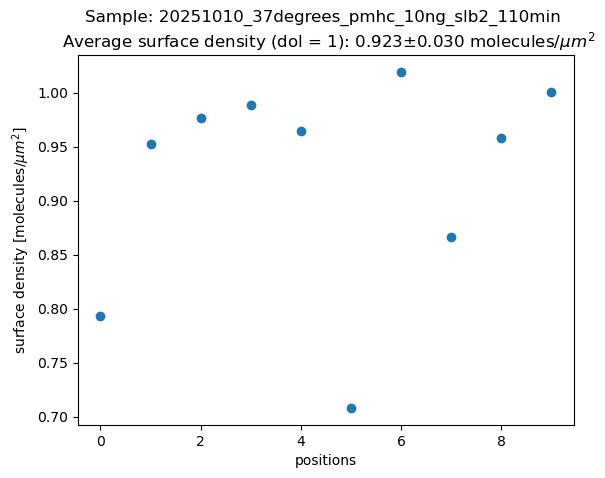

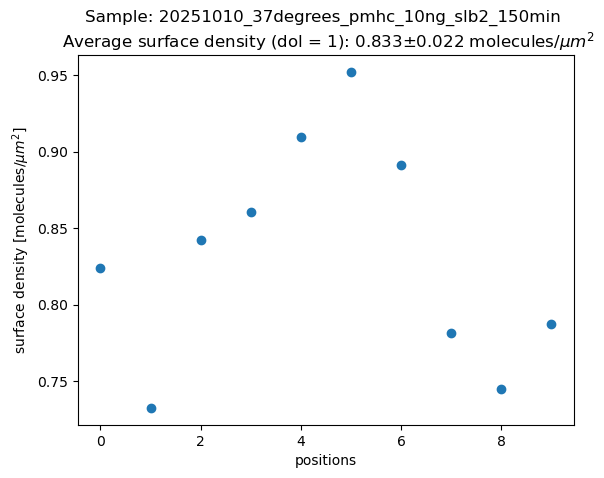

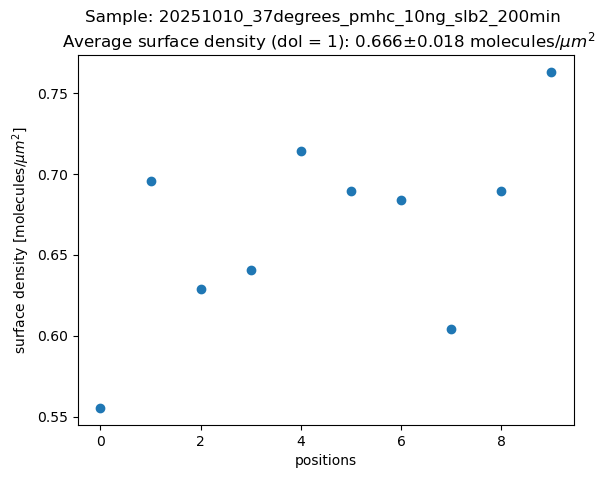

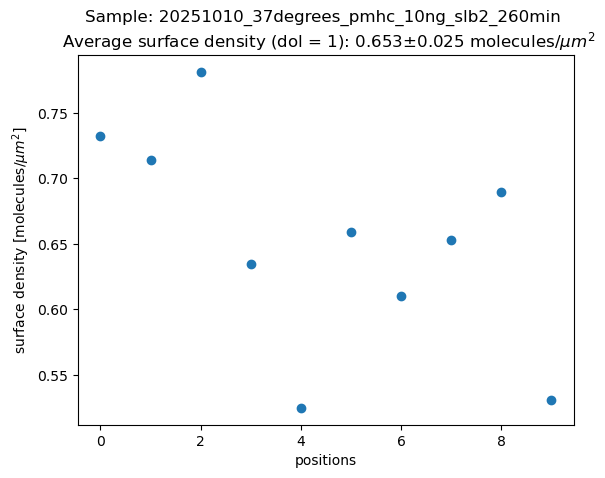

In [32]:
#surface density for individual sm filenames
surface_density_sm, sem_sm=sm_density(data_sm, data_files_sm_filename, sm_start_frame, size_um, dol)

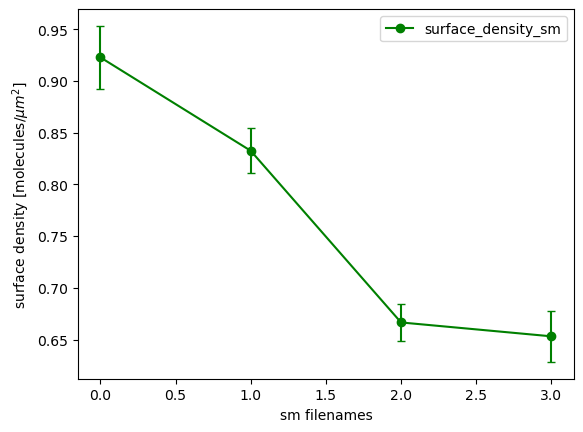

In [33]:
#overall sm surface density 
smdensity_brightness(data_sm, surface_density_sm, sem_sm)

2. bulk surface density

surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_80min: 11.86 molecules/um^2, sm_data correlated, overall mean of sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_140min: 6.5 molecules/um^2, sm_data correlated, overall mean of sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_190min: 6.34 molecules/um^2, sm_data correlated, overall mean of sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_250min: 9.07 molecules/um^2, sm_data correlated, overall mean of sm_data used


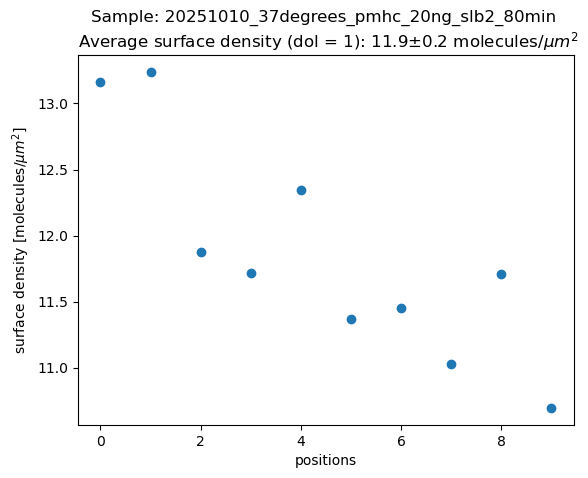

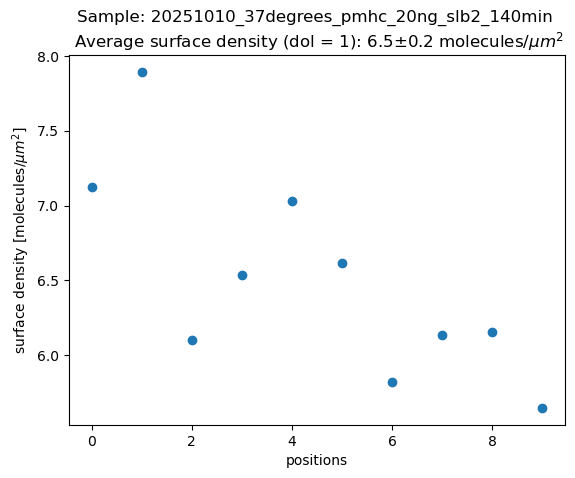

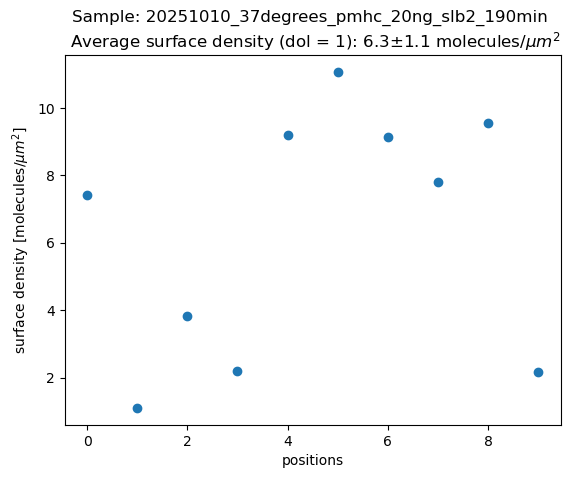

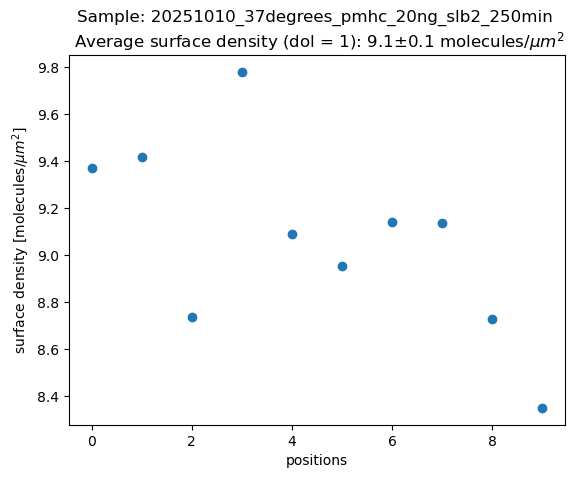

In [34]:
#surface density for individual bulk filenames
single_molecule_mean, single_molecule_bg, single_molecule_size, data_loc_brightness=brightness(data_brightness, data_files_brightness_filename, brightness_start_frame, brightness_final_frame, size_um, dol)

In [ ]:
surface_density_bulk_avg, surface_density_bulk_ind, mean_bulk=bulk_density(single_molecule_mean, single_molecule_bg, data_bulk, data_bulk_filename, bulk_start_frame, roi_imagej, size_um, dol, brightness_correlation)

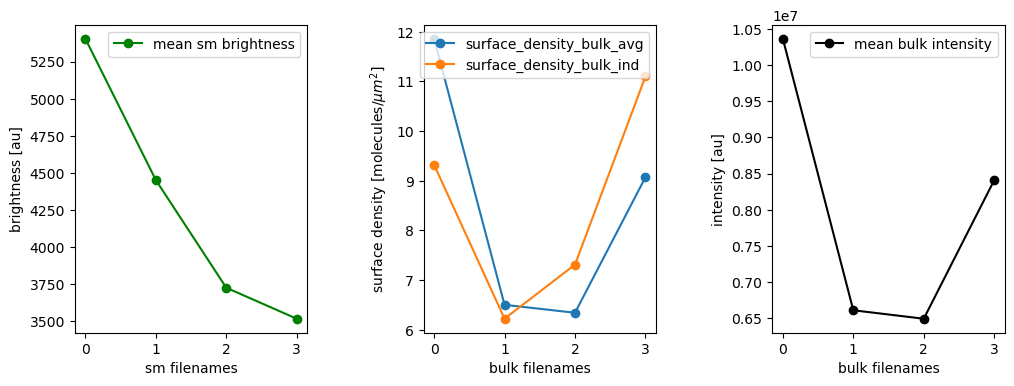

In [35]:
#surface density for all bulk filenames
bulkdensity_brightness(data_bulk, surface_density_bulk_avg,surface_density_bulk_ind, mean_bulk, surface_density_sm, single_molecule_mean)

3. quality check: sm brightness data

/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:583: RuntimeWarning: Mean of empty slice
  frame_list.append(np.nanmean(data_loc_sm[file][i][data_loc_sm[file][i]['frame']==frame]['mass']))


IndexError: list index out of range

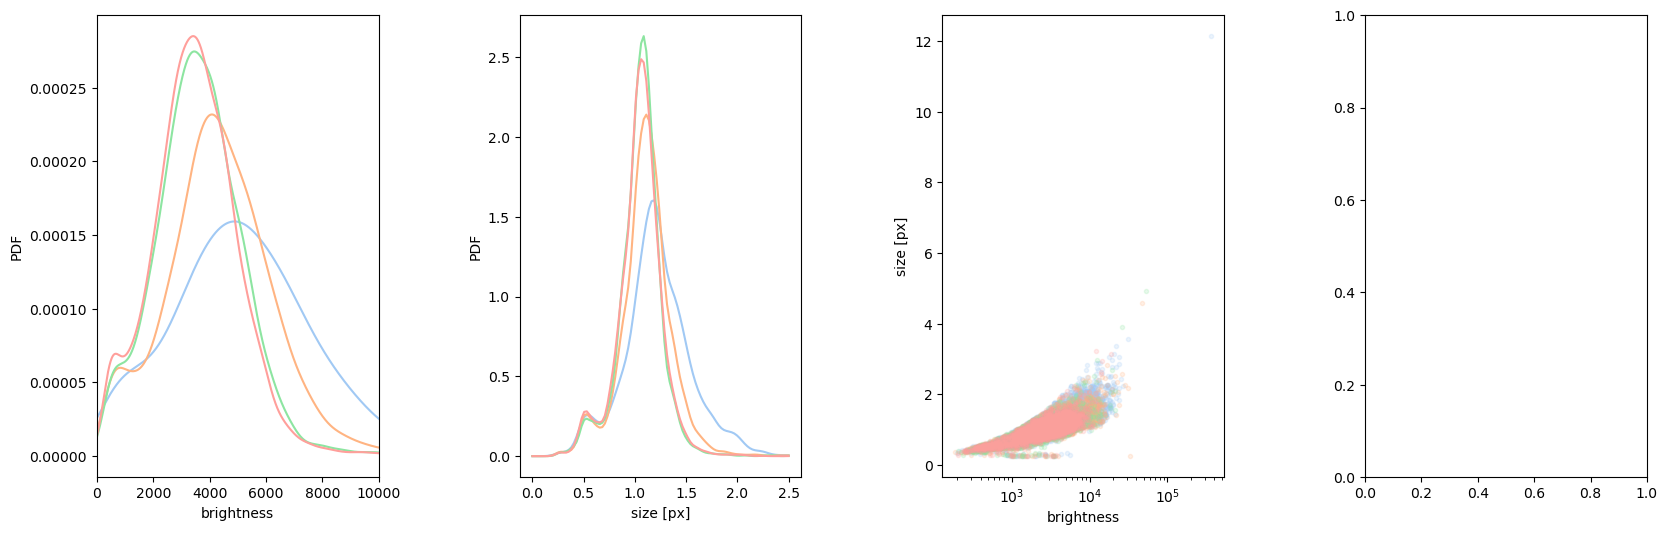

In [36]:
brightness_final(data_brightness, data_loc_brightness, single_molecule_size, single_molecule_mean, brightness_start_frame, brightness_final_frame)

slb1 02.10. | Bulk 110min (SM 130min) -> MeanDensity: 46.15, SEM: 0.42
slb1 02.10. | Bulk 240min (SM 260min) -> MeanDensity: 39.18, SEM: 0.32
slb1 02.10. | Normierungsfaktor: 46.15
slb2 02.10. | Bulk 110min (SM 130min) -> MeanDensity: 30.18, SEM: 0.29
slb2 02.10. | Bulk 190min (SM 210min) -> MeanDensity: 30.27, SEM: 0.28
slb2 02.10. | Bulk 250min (SM 260min) -> MeanDensity: 28.73, SEM: 0.36
slb2 02.10. | Normierungsfaktor: 30.18
slb1 09.10. | Bulk 40min (SM 60min) -> MeanDensity: 24.21, SEM: 3.42
slb1 09.10. | Bulk 170min (SM 190min) -> MeanDensity: 19.42, SEM: 1.05
slb1 09.10. | Bulk 230min (SM 260min) -> MeanDensity: 13.46, SEM: 1.24
slb1 09.10. | Normierungsfaktor: 24.21
slb2 09.10. | Bulk 40min (SM 60min) -> MeanDensity: 50.76, SEM: 0.30
slb2 09.10. | Bulk 180min (SM 190min) -> MeanDensity: 31.72, SEM: 0.49
slb2 09.10. | Bulk 240min (SM 270min) -> MeanDensity: 33.38, SEM: 0.61
slb2 09.10. | Normierungsfaktor: 50.76


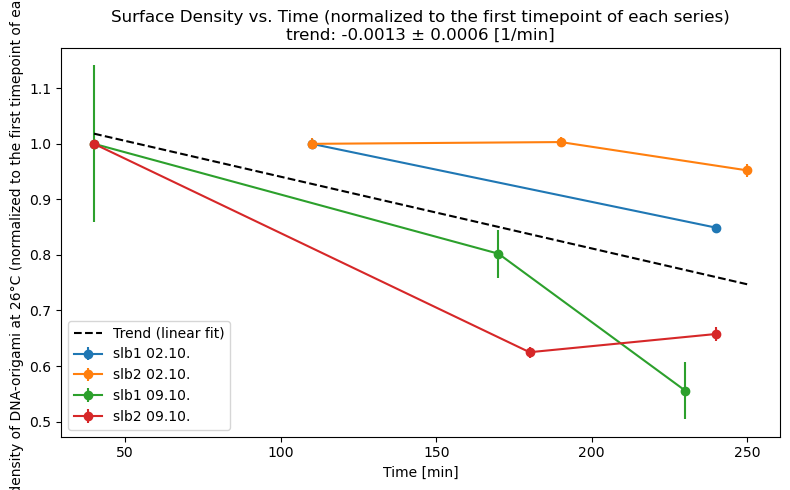

Gesamtplot mit Trendlinie gespeichert unter: /Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/surface_density_vs_time_ALL.png


In [47]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sdt import io, roi
import re
import os
import warnings

warnings.filterwarnings("ignore", message="The file header of .*SPE claims there are .* frames, but there are actually .* frames.")

data_sm_dirs = [
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/pmhc/20ng/slb1", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/pmhc/20ng/slb2", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251009_26degrees/pmhc/10ng/slb1", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251009_26degrees/pmhc/10ng/slb2"


]
data_bulk_dirs = [
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/origami/400ng/slb1", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/origami/400ng/slb2", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251009_26degrees/origami/400ng/slb1", r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251009_26degrees/origami/400ng/slb2"
]
series_labels = ["slb1 02.10.", "slb2 02.10.", "slb1 09.10.", "slb2 09.10."]

sm_start_frame = 20
sm_final_frame = 99
bulk_start_frame = 0
top_left = [20, 20]
bottom_right = [100, 100]
roi_imagej = roi.ROI((top_left[0], top_left[1]), (bottom_right[0], bottom_right[1]))
size = [bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]]
size_um = [size[0] * 0.160, size[1] * 0.160]

def extract_time_from_filename(fname):
    m = re.search(r"_(\d+)min", fname)
    return int(m.group(1)) if m else None

# Sammler für Trendlinie
all_plot_times = []
all_densities_time = []

# === Datenauswertung wie gehabt, aber noch kein Plot! ===
series_data = []
for idx, (data_sm, data_bulk) in enumerate(zip(data_sm_dirs, data_bulk_dirs)):
    sm_h5_files = sorted(Path(data_sm).glob("*.h5"))
    sm_time_to_files = dict()
    for f in sm_h5_files:
        t = extract_time_from_filename(f.name)
        if t is not None:
            sm_time_to_files.setdefault(t, []).append(f)
    sm_times = sorted(sm_time_to_files.keys())

    bulk_spe_files = sorted(Path(data_bulk).glob("*.SPE"))
    bulk_time_to_files = dict()
    for f in bulk_spe_files:
        t = extract_time_from_filename(f.name)
        if t is not None:
            bulk_time_to_files.setdefault(t, []).append(f)
    bulk_times = sorted(bulk_time_to_files.keys())

    raw_densities = []
    raw_sems = []
    plot_times = []

    for t_bulk in bulk_times:
        t_sm = min(sm_times, key=lambda x: abs(x - t_bulk))
        smfiles = sm_time_to_files[t_sm]
        bulkfiles = bulk_time_to_files[t_bulk]

        data_load_sm = [io.load(f) for f in smfiles]
        data_loc_sm = []
        for i in range(len(data_load_sm)):
            df = data_load_sm[i]
            data_loc_sm.append(df[df['frame'].between(sm_start_frame, sm_final_frame, inclusive='both')])
        single_molecule_mean = []
        single_molecule_bg = []
        for df in data_loc_sm:
            single_molecule_mean.append(np.mean(df['mass']))
            single_molecule_bg.append(np.mean(df['bg']))

        data_imgs_bulk = []
        for f in bulkfiles[:10]:
            ims_obj = io.ImageSequence(f)
            ims = ims_obj.open()
            try:
                img = ims[bulk_start_frame]
                data_imgs_bulk.append(img)
            finally:
                ims.close()
                ims_obj.close()
        bulk_roi = [np.sum(roi_imagej(i)) for i in data_imgs_bulk]

        bulk_roi_list = [
            ((i/(size_um[0]*size_um[1]))-(np.mean(single_molecule_bg)/(0.160*0.160))) / (np.mean(single_molecule_mean))
            for i in bulk_roi
        ]

        mean_density = np.mean(bulk_roi_list)
        sem_density = np.std(bulk_roi_list) / np.sqrt(len(bulk_roi_list)) if bulk_roi_list else np.nan
        raw_densities.append(mean_density)
        raw_sems.append(sem_density)
        plot_times.append(t_bulk)

        print(f"{series_labels[idx]} | Bulk {t_bulk}min (SM {t_sm}min) -> MeanDensity: {mean_density:.2f}, SEM: {sem_density:.2f}")
        
    # === Normierung auf ersten Wert der Dichte-Zeitreihe ===
    raw_densities = np.array(raw_densities)
    raw_sems = np.array(raw_sems)
    norm_factor = raw_densities[0] if raw_densities[0] != 0 else 1  # Schutz gegen Division durch 0
    densities_time = raw_densities / norm_factor
    sems_time = raw_sems / norm_factor

    print(f"{series_labels[idx]} | Normierungsfaktor: {norm_factor:.2f}")

    # Für späteren Plot und Trendlinie merken:
    series_data.append((plot_times, densities_time, sems_time, series_labels[idx]))
    all_plot_times.extend(plot_times)
    all_densities_time.extend(densities_time)

# === GESAMTPLOT erzeugen, anzeigen und speichern ===
plt.figure(figsize=(8, 5))

for plot_times, densities_time, sems_time, label in series_data:
    plt.errorbar(plot_times, densities_time, yerr=sems_time, fmt='o-', label=label)

# Trendlinie mit Unsicherheit (robust auch bei wenigen Punkten)
x = np.array(all_plot_times)
y = np.array(all_densities_time)
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

if len(x) > 2:  # mind. 3 Punkte für Fit mit Unsicherheitsabschätzung
    coef, cov = np.polyfit(x, y, 1, cov=True)
    p = np.poly1d(coef)
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = p(x_fit)
    plt.plot(x_fit, y_fit, 'k--', label='Trend (linear fit)')
    slope = coef[0]
    slope_err = np.sqrt(cov[0, 0])
    plt.title(f"Surface Density vs. Time (normalized to the first timepoint of each series)\n"
              f"trend: {slope:.4f} ± {slope_err:.4f} [1/min]")
elif len(x) == 2:  # nur Fit ohne Fehler möglich
    coef = np.polyfit(x, y, 1)
    p = np.poly1d(coef)
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = p(x_fit)
    plt.plot(x_fit, y_fit, 'k--', label='Trend (linear fit)')
    slope = coef[0]
    plt.title(f"Surface Density vs. Time (normalized to the first timepoint of each series)\n"
              f"trend: {slope:.4f} [1/min] (no error estimate)")
else:
    plt.title('Surface Density vs. Time (insufficient data for trend)')

plt.xlabel('Time [min]')
plt.ylabel('Surface density of DNA-origami at 26°C (normalized to the first timepoint of each series)')
plt.legend()
plt.tight_layout()
plt.show()

# === Speichern ===
def get_common_path(paths):
    from os.path import commonpath
    return commonpath(paths)
parent_folder = get_common_path(data_bulk_dirs)
out_plot_path = os.path.join(parent_folder, "surface_density_vs_time_ALL.png")
plt.figure(figsize=(8, 5))
for plot_times, densities_time, sems_time, label in series_data:
    plt.errorbar(plot_times, densities_time, yerr=sems_time, fmt='o-', label=label)
if len(x) > 1:
    plt.plot(x_fit, y_fit, 'k--', label='Trend (linear fit)')
    plt.title(f"Surface Density vs. Time (normalized to the first timepoint of each series)\n"
              f"trend: {slope:.4f} ± {slope_err:.4f} [1/min]")
else:
    plt.title('Surface Density vs. Time (all data)')
plt.xlabel('Time [min]')
plt.ylabel('Surface density (normalized to the first timepoint of each series)')
plt.legend()
plt.tight_layout()
plt.savefig(out_plot_path, bbox_inches='tight')
plt.close()
print(f"Gesamtplot mit Trendlinie gespeichert unter: {out_plot_path}")
